<a href="https://colab.research.google.com/github/Dezvi/GoogleColabs/blob/master/Practica1_1_de_DL_Regresi%C3%B3n_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejemplo de regresión con Keras + TensorFlow

##NOTA IMPORTANTE
Estos notebook están compartidos únicamente con **permisos de lectura**, por tanto no podrás ni ejecutarlos ni modificarlos.

Para poder interactuar con el notebook **debes hacer una copia del mismo en tu Drive**. Esto puedes hacerlo desde el menú "Archivo" de Colaboratory.

Si durante la realización de la práctica tienes la sensación de que **el notebook no está funcionando bien**, puedes ir al menú "Entorno de ejecución" de Colaboratoty y "Reiniciar el entorno de ejecución".

Recuerda que para ejecutar un trozo de código debes situar el cursor en el mismo y presionar **MAYS+ENTER**.

## 1. Importar librerías necesarias
Lo primero que vamos a hacer es instalar librerías necesarias para dibujar la red gráficamente. Estas librerías no son imprescindibles, pero vamos a incorporarlas para utilizar una función de keras que nos permitirá ver de manera gráfica la red creada.

Después cargaremos las librerías que sí son imprescindibles, entre las que se encuentran: keras, tensorflow, numpy,...



In [0]:
#Instalar librerias para dibujar la red gráficamente
!pip install pydot
!apt-get install graphviz

#Cargar librerias necesarias
import math
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


Using TensorFlow backend.


## 2. Generar los datos de entrenamiento

Ahora vamos a generar un conjunto de ejemplos para un problema de regresión. En concreto, nuestro problema tendrá ejemplos representados en $\mathbb{R}^2$. El valor real de estos ejemplos vendrá dado por la función $y=cos(x_0)+sin(x_1)$.

Esta función es claramente **no lineal**

 

In [0]:
seed = 2032  # semilla de números aleatorios 
NE = 5000  # se van a generar NE ejemplos

np.random.seed(seed)  # se inicializalizan los números aleatorios

# Generar una matriz de NE filas y 2 columnas con datos uniformes entre -5 y 5
laX = np.random.uniform(-5, 5, size=[NE, 2]) 

laY = np.zeros((NE, 1)) # Reservar espacio para la Y

# Rellenar el vector de la Y
for i in range(NE):
    laY[i] = math.cos(laX[i, 0])+math.sin(laX[i, 1]) # ruido = np.random.normal(0,sigma)

print(laX)
print(laY)

[[ 4.5557887   3.84923263]
 [-2.22296771  2.30424712]
 [ 0.9677073  -2.77795226]
 ...
 [ 3.52344383 -2.2835793 ]
 [-2.81862311  4.66132362]
 [ 4.81409483  1.67149958]]
[[-0.8060032 ]
 [ 0.13595516]
 [ 0.21151034]
 ...
 [-1.68452131]
 [-1.94699356]
 [ 1.09646431]]


## 3. Crear el modelo (modelo lineal)
Lo primero que vamos a hacer es crear una red sin capas ocultas. Esta red se conoce como perceptrón lineal y solo es capaz de resolver problemas lineales.

**Lee los comentarios del código detenidamente para entender lo que se está haciendo.**

*En la web de tensorflow puedes encontar tutoriales detallados*

Fíjate que la línea **print(model.summary())** imprime una representación en modo texto de la red y además indica el número de parámetros que se deben aprender en cada capa. En este caso hay una sola capa y los parámetros que hay que aprender son 3: los dos coeficientes que se multiplicarán por las entradas y el término independiente.






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
output_layer (Dense)         (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


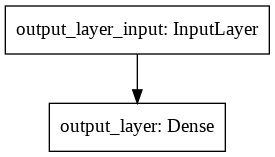

In [0]:
""" SE DEFINE LA RED """
tf.set_random_seed(seed)# Fijar semilla del keras/tensorflow

n_input = 2      # Celdas en la capa de entrada (variables de entrada)
n_output = 1     # Celdas en la capa de salida (un valor numérico)

# Definir las capas del modelo
model = Sequential()
model.add(Dense(n_output, input_dim=n_input, name="output_layer"))

# Como se puede ver, se crea un modelo secuencial donde cada capa añadida recibe
# como entrada la salida de la anterior.
# La dimensión de la entrada siempre se define en la primera capa del modelo 
# (parámetro input_dim) => model.add(Dense(n_output, input_dim=n_input, name="output_layer")) 

#Existe también una forma "funcional" de crear modelos. En este caso sería:
# in_layer = Input(shape =(n_input,))
# out_layer = Dense(n_output, name="out_layer")(in_layer)
# 
# model = Model(inputs = [in_layer], outputs = [out_layer])

""" SELECCIONAR OPTIMIZADOR E INICIALIZAR PARÁMETROS """
# Learning rate del modelo. Es el alpha que multiplicará a la derivada cuando
# se va a hacer la modificación de los parámetros que se aprenden. En el vídeo
# del "Descenso del gradiente" se explica su función
learning_rate = 0.001 

# Definir el optimizador a utilizar (SGD, descenso del gradiente estocástico)
# Consulta la ayuda para ver qué otros optimizadores hay
sgd = keras.optimizers.SGD(lr=learning_rate)

# Compilar el modelo indicando la función de pérdida (loss) y el optimizador
model.compile(loss='mean_squared_error', optimizer=sgd )

""" SE VISUALIZA EL MODELO """
# Imprimir en modo texto finalmente el resumen/arquitectura de nuestro modelo
# Esta información permite conocer el número de parámetros que se han de aprender
print(model.summary())

# Obtener un fichero con la representación gráfica del modelo
plot_model(model, to_file='model.png')
# Después de ejecutar esta línea se genera el fichero 'model.png'. Para poder 
# verlo, tienes que ir a la parte izquierda, acceder a la pestaña 'Archivos' y
# 'actualizar', aparecerá entonces el archivo y podrás verlo (doble click sobre
# el fichero 'model.png' o click con el botón derecho para descargarlo)


## 4. Entrenar el modelo
Una vez que ya hemos definido cómo va a ser nuestro modelo, vamos a entrenarlo para buscar los parámetros que hagan mínima la función de pérdida.

Para ello utilizaremos el método **fit**. Necesita que le suministremos los ejemplos (laX, laY), el tamaño del *batch* y el número de *epochs*. 

El número de epochs es el número de veces que el algoritmo va a ver los ejemplos durante el entrenamiento.

El tamaño del batch es el número de ejemplos que se van a utilizar en cada actualización de los parámetros.

En el código vemos que elegimos como tamaño de batch 128. Como tenemos 5000 ejemplos y 5000/128=39, esto quiere decir que en 39 actualizaciones de los parámetros llegamos a los 5000 ejemplos, lo que completaría una epoch. Como le indicamos en el código que queremos 200 epochs, estaremos permitiendo que el algoritmo haga en total 39x200=7800 actualizaciones.

Con **verbose=2** le pedimos que nos muestre el error al finalizar cada epoch.

Fíjate que lo que retorna fit lo almacenamos en una variable que llamamos history. Más adelante la utilizaremos.

In [0]:
batch = 128    # Tamaño del batch
n_epochs = 200 # Número de epochs

#Entrenar el modelo a partir de los ejemplos de TRAIN creados en el punto 2
history = model.fit(laX, laY, batch_size=batch, epochs=n_epochs, verbose=2)




Epoch 1/200





 - 1s - loss: 8.5920
Epoch 2/200
 - 0s - loss: 2.9700
Epoch 3/200
 - 0s - loss: 1.4910
Epoch 4/200
 - 0s - loss: 1.0905
Epoch 5/200
 - 0s - loss: 0.9836
Epoch 6/200
 - 0s - loss: 0.9545
Epoch 7/200
 - 0s - loss: 0.9442
Epoch 8/200
 - 0s - loss: 0.9403
Epoch 9/200
 - 0s - loss: 0.9375
Epoch 10/200
 - 0s - loss: 0.9360
Epoch 11/200
 - 0s - loss: 0.9345
Epoch 12/200
 - 0s - loss: 0.9334
Epoch 13/200
 - 0s - loss: 0.9325
Epoch 14/200
 - 0s - loss: 0.9315
Epoch 15/200
 - 0s - loss: 0.9306
Epoch 16/200
 - 0s - loss: 0.9300
Epoch 17/200
 - 0s - loss: 0.9296
Epoch 18/200
 - 0s - loss: 0.9290
Epoch 19/200
 - 0s - loss: 0.9288
Epoch 20/200
 - 0s - loss: 0.9285
Epoch 21/200
 - 0s - loss: 0.9282
Epoch 22/200
 - 0s - loss: 0.9280
Epoch 23/200
 - 0s - loss: 0.9277
Epoch 24/200
 - 0s - loss: 0.9275
Epoch 25/200
 - 0s - loss: 0.9274
Epoch 26/200
 - 0s - loss: 0.9273
Epoch 27/200
 - 0s - loss: 0.9272
Epoch 28/200
 - 0s - loss: 0.9271
Epoch 29/200
 - 0s - loss: 0.9270
Epoch 30/200
 -

##5. Función para dibujar la gráfica del error
Tras realizar el entrenamiento con fit, almacenamos lo que retorna ese método en una variable que llamamos history.

Definimos ahora la función **plot_history** que recibiendo lo retornado por fit, crea un gráfico en el que se ve la evolución del error que se está minimizando en función de la epoch en la que se está.

Máximo error: 8.591954914855958
Mínimo error: 0.9264289882659912


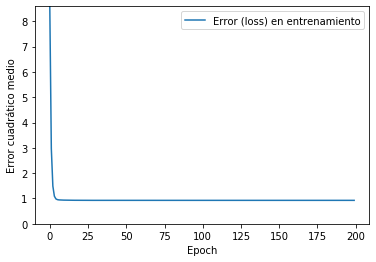

In [0]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Error cuadrático medio')
  plt.plot(history.epoch, np.array(history.history['loss']),
           label='Error (loss) en entrenamiento')
  plt.legend()
  plt.ylim([0, max(1,max(np.array(history.history['loss'])))])

plot_history(history)
print("Máximo error:",max(np.array(history.history['loss'])))
print("Mínimo error:",min(np.array(history.history['loss'])))


##6. Crear un modelo no lineal
El modelo anterior tiene una limitación muy grande: es un modelo lineal y eso le impide adaptarse de manera apropiada para resolver problemas no lineales.

Aun así, logra bajar el error hasta 0.926. 

Vamos a ver ahora lo que sucede si creamos un modelo no lineal. Para ello vamos a incluir una capa oculta que tenga como función de activación la función **ReLU**.

Observa con detenimiento cómo se añade la capa, ya que tendrás posteriormente que añadir más capas.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1_layer (Dense)        (None, 10)                30        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None


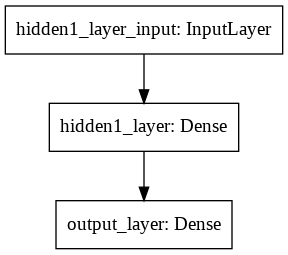

In [0]:
""" SE DEFINE LA RED """
tf.set_random_seed(seed)# Fijar semilla del keras/tensorflow

n_input = 2      # Celdas en la capa de entrada (variables de entrada)
n_hidden1 = 10   # Celdas en la capa oculta
n_output = 1     # Celdas en la capa de salida (un valor numérico)

# Definir las capas del modelo
model = Sequential()
model.add(Dense(n_hidden1, input_dim=n_input,activation='relu', name="hidden1_layer"))
model.add(Dense(n_output,name="output_layer"))

# Como se puede ver, se crea un modelo secuencial donde cada capa añadida recibe
# como entrada la salida de la anterior.
# La dimensión de la entrada siempre se define en la primera capa del modelo 
# (parámetro input_dim) => model.add(Dense(n_hidden1, input_dim=n_input, name="hidden1_layer")) 


#Existe también una forma "funcional" de crear modelos. En este caso sería:
# in_layer = Input(shape =(n_input,))
# hidden_layer = Dense(n_hidden1, name="hidden1_layer",activation='relu')(in_layer)
# out_layer = Dense(n_output, name="out_layer")(hidden_layer)
# 
# model = Model(inputs = [in_layer], outputs = [out_layer])

""" SE DEFINE EL MODELO """

# Learning rate del modelo. Es el alpha que multiplicará a la derivada cuando
# se va a hacer la modificación de los parámetros que se aprenden. En el vídeo
# del "Descenso del gradiente" se explica su función
learning_rate = 0.001 

# Definir el optimizador a utilizar (SGD, descenso del gradiente estocástico)
sgd = keras.optimizers.SGD(lr=learning_rate)

# Compilar el modelo indicando la función de pérdida (loss) y el optimizador
model.compile(loss='mean_squared_error', optimizer=sgd )

""" SE VISUALIZA EL MODELO """

# Imprimir en modo texto finalmente el resumen/arquitectura de nuestro modelo
# Esta información permite conocer el número de parámetros que se han de aprender
print(model.summary())

# Obtener un fichero con la representación gráfica del modelo
plot_model(model, to_file='model.png')
# Después de ejecutar esta línea se genera el fichero 'model.png'. Para poder 
# verlo, tienes que ir a la parte izquierda, acceder a la pestaña 'Archivos' y
# 'actualizar', aparecerá entonces el archivo y podrás verlo (doble click sobre
# el fichero 'model.png' o click con el botón derecho para descargarlo)

##7. Y lo ejecutamos
Ponemos **verbose=0** y así no tendremos que hacer tanto scroll. Eso sí, el resultado final tardará en aparecer unos segundos.

Máximo error: 2.5543531955718994
Máximo error: 0.4265719232559204


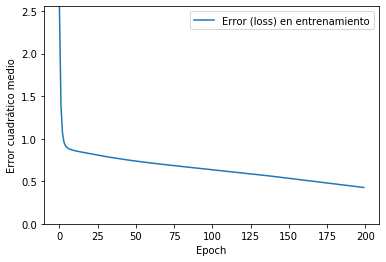

In [0]:
#Entrenar el modelo a partir de los ejemplos de TRAIN creados en el punto 2
history = model.fit(laX, laY, batch_size=batch, epochs=n_epochs, verbose=0 )

plot_history(history)
print("Máximo error:",max(np.array(history.history['loss'])))
print("Máximo error:",min(np.array(history.history['loss'])))

Como puedes ver, el error se ha hecho más pequeño. Esto es normal, ya que una red con una capa oculta ya es capaz de aprender funciones no lineales.

##8. Crea tú ahora una red con 2 capas ocultas
Debes crear una red con 2 capas ocultas. La primera con 6 celdas y la segunda con 4 celdas.

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1_layer (Dense)        (None, 16)                48        
_________________________________________________________________
hidden2_layer (Dense)        (None, 8)                 136       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 9         
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


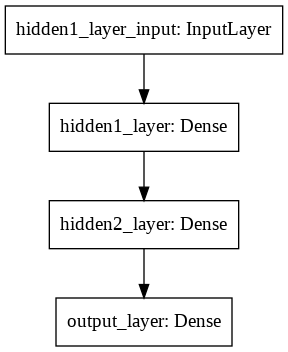

In [0]:
""" SE DEFINE LA RED """
tf.set_random_seed(seed)# Fijar semilla del keras/tensorflow

n_input = 2      # Celdas en la capa de entrada (variables de entrada)
n_hidden1 = 16   # Celdas en la capa oculta
n_hidden2 = 8   # Celdas en la capa oculta
n_output = 1     # Celdas en la capa de salida (un valor numérico)

# Definir las capas del modelo
model = Sequential()
model.add(Dense(n_hidden1, input_dim=n_input,activation='relu', name="hidden1_layer"))
model.add(Dense(n_hidden2, input_dim=n_hidden1,activation='relu', name="hidden2_layer"))
model.add(Dense(n_output,name="output_layer"))

""" SE DEFINE EL MODELO """

# Learning rate del modelo. Es el alpha que multiplicará a la derivada cuando
# se va a hacer la modificación de los parámetros que se aprenden. En el vídeo
# del "Descenso del gradiente" se explica su función
learning_rate = 0.001 

# Definir el optimizador a utilizar (SGD, descenso del gradiente estocástico)
sgd = keras.optimizers.SGD(lr=learning_rate)

# Compilar el modelo indicando la función de pérdida (loss) y el optimizador
model.compile(loss='mean_squared_error', optimizer=sgd )

""" SE VISUALIZA EL MODELO """

# Imprimir en modo texto finalmente el resumen/arquitectura de nuestro modelo
# Esta información permite conocer el número de parámetros que se han de aprender
print(model.summary())

# Obtener un fichero con la representación gráfica del modelo
plot_model(model, to_file='model.png')
# Después de ejecutar esta línea se genera el fichero 'model.png'. Para poder 
# verlo, tienes que ir a la parte izquierda, acceder a la pestaña 'Archivos' y
# 'actualizar', aparecerá entonces el archivo y podrás verlo (doble click sobre
# el fichero 'model.png' o click con el botón derecho para descargarlo)

Ejecuta el siguiente código para ver el rendimiento de la red que acabas de crear.

Máximo error: 1.784664376115799
Mínimo error: 0.19550148845911025


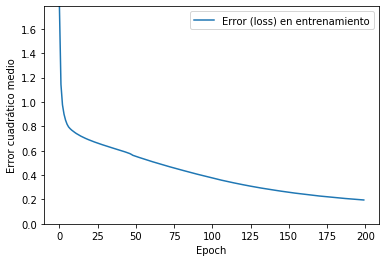

In [0]:
#Entrenar el modelo a partir de los ejemplos de TRAIN creados en el punto 2
history = model.fit(laX, laY, batch_size=batch, epochs=n_epochs, verbose=0 )

plot_history(history)
print("Máximo error:",max(np.array(history.history['loss'])))
print("Mínimo error:",min(np.array(history.history['loss'])))

Puedes probar otras configuraciones de red para intentar obtener mejores resultados.

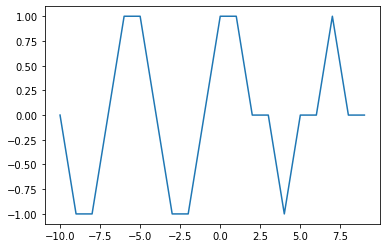

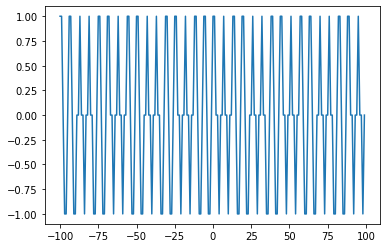

In [0]:
# Primero veamos cómo es nuestra función
# Claramente al ser una mezcla entre función coseno y seno es repetitiva
# Asi que pensemos un poco cómo mejorar los resultados
# Hagamos cambios a ciegas y luego ya pensaremos que más podemos hacer
# Por ejemplo aumentemos las redes ocultas porque ya vimos que disminuia el error
# y podemos cambiar nuestro optimizador
rr = np.arange(-10, 10, 1)

def y(o): 
    return np.cos(o)+np.sin(o)

plt.plot(rr, y(rr).astype(np.int))
plt.show()

rr = np.arange(-100, 100, 1)

def y(o): 
    return np.cos(o)+np.sin(o)

plt.plot(rr, y(rr).astype(np.int))
plt.show()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1_layer (Dense)        (None, 64)                192       
_________________________________________________________________
hidden2_layer (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden3_layer (Dense)        (None, 16)                528       
_________________________________________________________________
hidden4_layer (Dense)        (None, 8)                 136       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 9         
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________
None


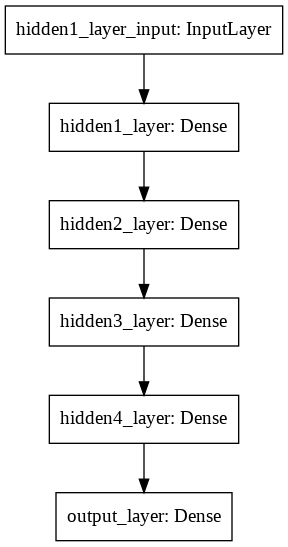

In [0]:
""" SE DEFINE LA RED """
tf.set_random_seed(seed)# Fijar semilla del keras/tensorflow

n_input = 2      # Celdas en la capa de entrada (variables de entrada)
n_hidden1 = 64   # Celdas en la capa oculta
n_hidden2 = 32   # Celdas en la capa oculta
n_hidden3 = 16   # Celdas en la capa oculta
n_hidden4 = 8   # Celdas en la capa oculta
n_output = 1     # Celdas en la capa de salida (un valor numérico)

# Definir las capas del modelo
model = Sequential()
model.add(Dense(n_hidden1, input_dim=n_input,  activation='relu', name="hidden1_layer"))
model.add(Dense(n_hidden2, input_dim=n_hidden1,activation='relu', name="hidden2_layer"))
model.add(Dense(n_hidden3, input_dim=n_hidden2,activation='relu', name="hidden3_layer"))
model.add(Dense(n_hidden4, input_dim=n_hidden3,activation='relu', name="hidden4_layer"))
model.add(Dense(n_output,name="output_layer"))

""" SE DEFINE EL MODELO """

# Learning rate del modelo. Es el alpha que multiplicará a la derivada cuando
# se va a hacer la modificación de los parámetros que se aprenden. En el vídeo
# del "Descenso del gradiente" se explica su función
learning_rate = 0.001 

# Definir el optimizador a utilizar (SGD, descenso del gradiente estocástico)
sgd = keras.optimizers.SGD(lr=learning_rate)

# Compilar el modelo indicando la función de pérdida (loss) y el optimizador
model.compile(loss='mean_squared_error', optimizer=sgd )

""" SE VISUALIZA EL MODELO """

# Imprimir en modo texto finalmente el resumen/arquitectura de nuestro modelo
# Esta información permite conocer el número de parámetros que se han de aprender
print(model.summary())

# Obtener un fichero con la representación gráfica del modelo
plot_model(model, to_file='model.png')
# Después de ejecutar esta línea se genera el fichero 'model.png'. Para poder 
# verlo, tienes que ir a la parte izquierda, acceder a la pestaña 'Archivos' y
# 'actualizar', aparecerá entonces el archivo y podrás verlo (doble click sobre
# el fichero 'model.png' o click con el botón derecho para descargarlo)

Máximo error: 1.0498465118408202
Mínimo error: 0.07200246825814247


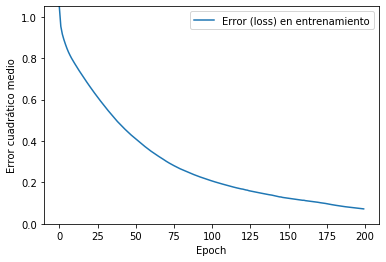

In [0]:
#Entrenar el modelo a partir de los ejemplos de TRAIN creados en el punto 2
history = model.fit(laX, laY, batch_size=batch, epochs=n_epochs, verbose=0 )

plot_history(history)
print("Máximo error:",max(np.array(history.history['loss'])))
print("Mínimo error:",min(np.array(history.history['loss'])))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1_layer (Dense)        (None, 1024)              3072      
_________________________________________________________________
hidden2_layer (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden3_layer (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden4_layer (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden5_layer (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden6_layer (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden7_layer (Dense)        (None, 16)               

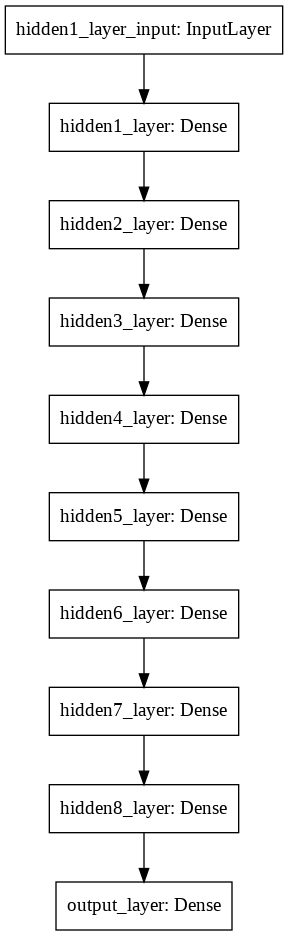

In [0]:
#Vemos que el error sigue bajando, sigamos con esta estrategia a ver hasta donde podemos llegar
""" SE DEFINE LA RED """
tf.set_random_seed(seed)# Fijar semilla del keras/tensorflow

n_input = 2      # Celdas en la capa de entrada (variables de entrada)
n_hidden1 = 1024   # Celdas en la capa oculta
n_hidden2 = 512   # Celdas en la capa oculta
n_hidden3 = 256   # Celdas en la capa oculta
n_hidden4 = 128   # Celdas en la capa oculta
n_hidden5 = 64   # Celdas en la capa oculta
n_hidden6 = 32   # Celdas en la capa oculta
n_hidden7 = 16   # Celdas en la capa oculta
n_hidden8 = 8   # Celdas en la capa oculta
n_output = 1     # Celdas en la capa de salida (un valor numérico)

# Definir las capas del modelo
model = Sequential()
model.add(Dense(n_hidden1, input_dim=n_input,  activation='relu', name="hidden1_layer"))
model.add(Dense(n_hidden2, input_dim=n_hidden1,activation='relu', name="hidden2_layer"))
model.add(Dense(n_hidden3, input_dim=n_hidden2,activation='relu', name="hidden3_layer"))
model.add(Dense(n_hidden4, input_dim=n_hidden3,activation='relu', name="hidden4_layer"))
model.add(Dense(n_hidden5, input_dim=n_hidden4,activation='relu', name="hidden5_layer"))
model.add(Dense(n_hidden6, input_dim=n_hidden5,activation='relu', name="hidden6_layer"))
model.add(Dense(n_hidden7, input_dim=n_hidden6,activation='relu', name="hidden7_layer"))
model.add(Dense(n_hidden8, input_dim=n_hidden7,activation='relu', name="hidden8_layer"))
model.add(Dense(n_output,name="output_layer"))

""" SE DEFINE EL MODELO """

# Learning rate del modelo. Es el alpha que multiplicará a la derivada cuando
# se va a hacer la modificación de los parámetros que se aprenden. En el vídeo
# del "Descenso del gradiente" se explica su función
learning_rate = 0.001 

# Definir el optimizador a utilizar (SGD, descenso del gradiente estocástico)
sgd = keras.optimizers.SGD(lr=learning_rate)

# Compilar el modelo indicando la función de pérdida (loss) y el optimizador
model.compile(loss='mean_squared_error', optimizer=sgd )

""" SE VISUALIZA EL MODELO """

# Imprimir en modo texto finalmente el resumen/arquitectura de nuestro modelo
# Esta información permite conocer el número de parámetros que se han de aprender
print(model.summary())

# Obtener un fichero con la representación gráfica del modelo
plot_model(model, to_file='model.png')
# Después de ejecutar esta línea se genera el fichero 'model.png'. Para poder 
# verlo, tienes que ir a la parte izquierda, acceder a la pestaña 'Archivos' y
# 'actualizar', aparecerá entonces el archivo y podrás verlo (doble click sobre
# el fichero 'model.png' o click con el botón derecho para descargarlo)

Máximo error: 0.9660480577468872
Mínimo error: 0.0038263309229165316


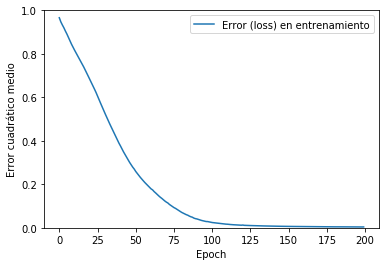

In [0]:
#Entrenar el modelo a partir de los ejemplos de TRAIN creados en el punto 2
history = model.fit(laX, laY, batch_size=batch, epochs=n_epochs, verbose=0 )

plot_history(history)
print("Máximo error:",max(np.array(history.history['loss'])))
print("Mínimo error:",min(np.array(history.history['loss'])))

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1_layer (Dense)        (None, 1024)              3072      
_________________________________________________________________
hidden2_layer (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden3_layer (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden4_layer (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden5_layer (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden6_layer (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden7_layer (Dense)        (None, 16)              

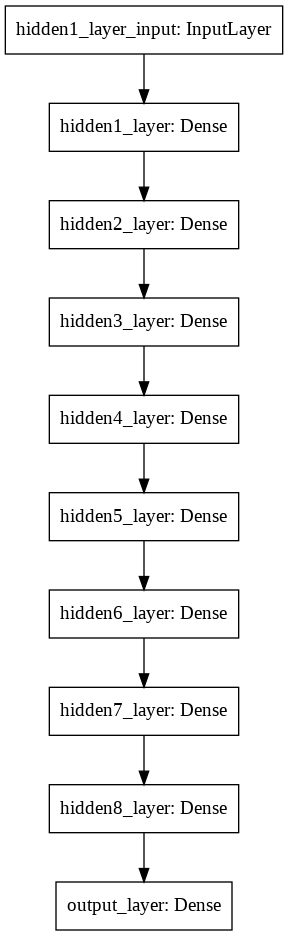

In [0]:
#Cambiemos al optimizador Adam que vimos que va más directamente a la función objetivo
""" SE DEFINE LA RED """
tf.set_random_seed(seed)# Fijar semilla del keras/tensorflow

n_input = 2      # Celdas en la capa de entrada (variables de entrada)
n_hidden1 = 1024   # Celdas en la capa oculta
n_hidden2 = 512   # Celdas en la capa oculta
n_hidden3 = 256   # Celdas en la capa oculta
n_hidden4 = 128   # Celdas en la capa oculta
n_hidden5 = 64   # Celdas en la capa oculta
n_hidden6 = 32   # Celdas en la capa oculta
n_hidden7 = 16   # Celdas en la capa oculta
n_hidden8 = 8   # Celdas en la capa oculta
n_output = 1     # Celdas en la capa de salida (un valor numérico)


laX = np.reshape(laX, (laX.shape[0], 2))

# Definir las capas del modelo
model = Sequential()
model.add(Dense(n_hidden1, input_dim=n_input,  activation='relu', name="hidden1_layer"))
model.add(Dense(n_hidden2, input_dim=n_hidden1,activation='relu', name="hidden2_layer"))
model.add(Dense(n_hidden3, input_dim=n_hidden2,activation='relu', name="hidden3_layer"))
model.add(Dense(n_hidden4, input_dim=n_hidden3,activation='relu', name="hidden4_layer"))
model.add(Dense(n_hidden5, input_dim=n_hidden4,activation='relu', name="hidden5_layer"))
model.add(Dense(n_hidden6, input_dim=n_hidden5,activation='relu', name="hidden6_layer"))
model.add(Dense(n_hidden7, input_dim=n_hidden6,activation='relu', name="hidden7_layer"))
model.add(Dense(n_hidden8, input_dim=n_hidden7,activation='relu', name="hidden8_layer"))
model.add(Dense(n_output,name="output_layer"))

""" SE DEFINE EL MODELO """

# Compilar el modelo indicando la función de pérdida (loss) y el optimizador
model.compile(loss='mean_squared_error', optimizer='adam' )

""" SE VISUALIZA EL MODELO """

# Imprimir en modo texto finalmente el resumen/arquitectura de nuestro modelo
# Esta información permite conocer el número de parámetros que se han de aprender
print(model.summary())

# Obtener un fichero con la representación gráfica del modelo
plot_model(model, to_file='model.png')
# Después de ejecutar esta línea se genera el fichero 'model.png'. Para poder 
# verlo, tienes que ir a la parte izquierda, acceder a la pestaña 'Archivos' y
# 'actualizar', aparecerá entonces el archivo y podrás verlo (doble click sobre
# el fichero 'model.png' o click con el botón derecho para descargarlo)

Máximo error: 0.643298567199707
Mínimo error: 0.00021604676842689515


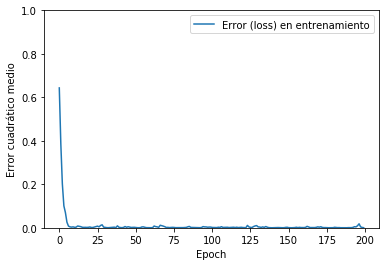

In [0]:
#Entrenar el modelo a partir de los ejemplos de TRAIN creados en el punto 2
history = model.fit(laX, laY, batch_size=batch, epochs=n_epochs, verbose=0 )

plot_history(history)
print("Máximo error:",max(np.array(history.history['loss'])))
print("Mínimo error:",min(np.array(history.history['loss'])))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(2, 1), name="lstm1_layer", dropout=0.2, recurrent_dropout=0.2)`
  


Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm1_layer (LSTM)           (None, 4)                 96        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
None


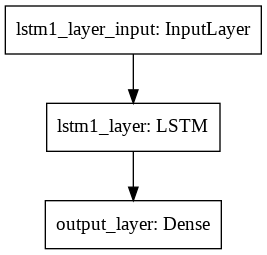

In [0]:
# Podemos ver que sigue bajando el problema es que tarda muchísimo en entrenar estas redes
# Con tantas redes totalmente conectadas, intentemos hacer una arquitectura para este tipo
# de funciones, podemos ver que se repite así que usando un poco de mis conocimientos previos
# Utilicemos una red LSTM (Recurrente) para permitirle recordar esas variaciones

from keras.layers import LSTM
""" SE DEFINE LA RED """
tf.set_random_seed(seed)# Fijar semilla del keras/tensorflow

n_input = (2, 1)      # Celdas en la capa de entrada (variables de entrada)
n_hidden_lstm1 = 4   # Celdas en la capa oculta
n_output = 1     # Celdas en la capa de salida (un valor numérico)

laX = np.reshape(laX, (laX.shape[0], 2, 1))

# Definir las capas del modelo
model = Sequential()
model.add(LSTM(n_hidden_lstm1, input_shape=n_input, dropout_U = 0.2, dropout_W = 0.2, name="lstm1_layer"))
model.add(Dense(n_output, name="output_layer"))

""" SE DEFINE EL MODELO """

# Compilar el modelo indicando la función de pérdida (loss) y el optimizador
model.compile(loss='mean_squared_error', optimizer='adam' )

""" SE VISUALIZA EL MODELO """

# Imprimir en modo texto finalmente el resumen/arquitectura de nuestro modelo
# Esta información permite conocer el número de parámetros que se han de aprender
print(model.summary())

# Obtener un fichero con la representación gráfica del modelo
plot_model(model, to_file='model.png')
# Después de ejecutar esta línea se genera el fichero 'model.png'. Para poder 
# verlo, tienes que ir a la parte izquierda, acceder a la pestaña 'Archivos' y
# 'actualizar', aparecerá entonces el archivo y podrás verlo (doble click sobre
# el fichero 'model.png' o click con el botón derecho para descargarlo)

Máximo error: 0.9614648036956787
Mínimo error: 0.29648675174713135


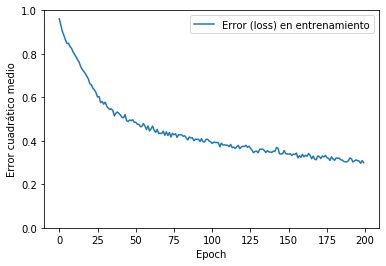

In [0]:
#Entrenar el modelo a partir de los ejemplos de TRAIN creados en el punto 2
history = model.fit(laX, laY, batch_size=batch, epochs=n_epochs, verbose=0 )

plot_history(history)
print("Máximo error:",max(np.array(history.history['loss'])))
print("Mínimo error:",min(np.array(history.history['loss'])))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(16, input_shape=(2, 1), return_sequences=True, name="lstm1_layer", dropout=0.2, recurrent_dropout=0.2)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(16, input_shape=(16, 1), name="lstm2_layer", dropout=0.2, recurrent_dropout=0.2)`
  app.launch_new_instance()


Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm1_layer (LSTM)           (None, 2, 16)             1152      
_________________________________________________________________
lstm2_layer (LSTM)           (None, 16)                2112      
_________________________________________________________________
hidden1_layer (Dense)        (None, 1024)              17408     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 1025      
Total params: 21,697
Trainable params: 21,697
Non-trainable params: 0
_________________________________________________________________
None


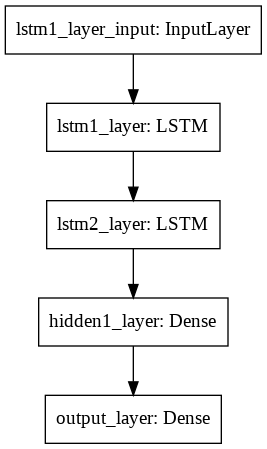

In [0]:
# Podemos ver que aunque tarde un poco más en entrenar con unas pocas neuronas
# Ya estamos teniendo una gran mejora, sigamos explorando distintas opciones

from keras.layers import LSTM
""" SE DEFINE LA RED """
tf.set_random_seed(seed)# Fijar semilla del keras/tensorflow

n_input = (2, 1)      # Celdas en la capa de entrada (variables de entrada)
n_hidden_lstm1 = 16   # Celdas en la capa oculta
n_input_lstm2 = (n_hidden_lstm1, 1)   # Input to lstm_2
n_output = 1     # Celdas en la capa de salida (un valor numérico)

laX = np.reshape(laX, (laX.shape[0], 2, 1))

# Definir las capas del modelo
model = Sequential()
model.add(LSTM(n_hidden_lstm1, input_shape=n_input, dropout_U = 0.2, dropout_W = 0.2, return_sequences=True, name="lstm1_layer"))
model.add(LSTM(n_hidden_lstm1, input_shape=n_input_lstm2, dropout_U = 0.2, dropout_W = 0.2, name="lstm2_layer"))
model.add(Dense(n_hidden1, input_dim=n_hidden_lstm1,  activation='relu', name="hidden1_layer"))
model.add(Dense(n_output, name="output_layer"))

""" SE DEFINE EL MODELO """

# Compilar el modelo indicando la función de pérdida (loss) y el optimizador
model.compile(loss='mean_squared_error', optimizer='adam' )

""" SE VISUALIZA EL MODELO """

# Imprimir en modo texto finalmente el resumen/arquitectura de nuestro modelo
# Esta información permite conocer el número de parámetros que se han de aprender
print(model.summary())

# Obtener un fichero con la representación gráfica del modelo
plot_model(model, to_file='model.png')
# Después de ejecutar esta línea se genera el fichero 'model.png'. Para poder 
# verlo, tienes que ir a la parte izquierda, acceder a la pestaña 'Archivos' y
# 'actualizar', aparecerá entonces el archivo y podrás verlo (doble click sobre
# el fichero 'model.png' o click con el botón derecho para descargarlo)

Máximo error: 0.9330330270767212
Mínimo error: 0.12156494991779328


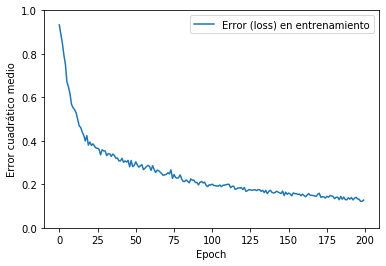

In [0]:
#Entrenar el modelo a partir de los ejemplos de TRAIN creados en el punto 2
history = model.fit(laX, laY, batch_size=batch, epochs=n_epochs, verbose=0 )

plot_history(history)
print("Máximo error:",max(np.array(history.history['loss'])))
print("Mínimo error:",min(np.array(history.history['loss'])))

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm1_layer (LSTM)           (None, 2, 100)            40800     
_________________________________________________________________
lstm2_layer (LSTM)           (None, 100)               80400     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None
Máximo error: 0.9278155258178711
Mínimo error: 2.1225054419483057e-05


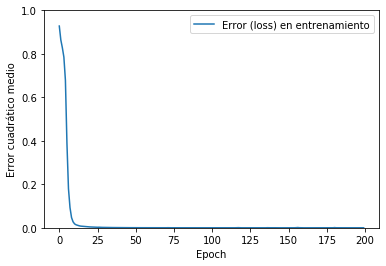

In [0]:
# Podemos ver que ha disminuido el error aumentando el número de capas y su número de neuronas
# así que terminemos de explorar esta estrategia

from keras.layers import LSTM
""" SE DEFINE LA RED """
tf.set_random_seed(seed)# Fijar semilla del keras/tensorflow

n_input = (2, 1)      # Celdas en la capa de entrada (variables de entrada)
n_hidden_lstm1 = 100   # Celdas en la capa oculta
n_input_lstm2 = (n_hidden_lstm1, 1)   # Input to lstm_2
n_output = 1     # Celdas en la capa de salida (un valor numérico)

laX = np.reshape(laX, (laX.shape[0], 2, 1))

# Definir las capas del modelo
model = Sequential()
model.add(LSTM(n_hidden_lstm1, input_shape=n_input, return_sequences=True, name="lstm1_layer"))
model.add(LSTM(n_hidden_lstm1, input_shape=n_input, return_sequences=False, name="lstm2_layer"))
model.add(Dense(n_output, name="output_layer"))

""" SE DEFINE EL MODELO """

# Learning rate del modelo. Es el alpha que multiplicará a la derivada cuando
# se va a hacer la modificación de los parámetros que se aprenden. En el vídeo
# del "Descenso del gradiente" se explica su función
learning_rate = 0.001 

# Definir el optimizador a utilizar (SGD, descenso del gradiente estocástico)
adam = keras.optimizers.Adam(lr=learning_rate)

# Compilar el modelo indicando la función de pérdida (loss) y el optimizador
model.compile(loss='mean_squared_error', optimizer='adam' )

""" SE VISUALIZA EL MODELO """

# Imprimir en modo texto finalmente el resumen/arquitectura de nuestro modelo
# Esta información permite conocer el número de parámetros que se han de aprender
print(model.summary())

# Obtener un fichero con la representación gráfica del modelo
plot_model(model, to_file='model.png')

#Entrenar el modelo a partir de los ejemplos de TRAIN creados en el punto 2
#Mantengamos el mismo número de epochs por ahora
history = model.fit(laX, laY, batch_size=batch, epochs=n_epochs, verbose=0 )

plot_history(history)
print("Máximo error:",max(np.array(history.history['loss'])))
print("Mínimo error:",min(np.array(history.history['loss'])))

Como podemos ver con casi 7 veces menos parámetros entrenables conseguimos un error bastante más pequeño lo que quiere decir que utilizando nuestro conocimiento de los datos podemos variar la arquitectura de nuestra red para trabajar mejor con estos datos y hacer mejores predicciones.